# Southern African Wildfire Data Analysis

To make a project similar to this storymap, [Southern African Wildfires](https://arcgis.asdc.larc.nasa.gov/portal/apps/Cascade/index.html?appid=0c4690ce51f54cf09b4ad00a25059a82), you will want to begin with collecting data from the Atmospheric Science Data Center (ASDC). This data can be used to make visual aides that can be analyzed and displayed in a StoryMap. 

### How To Use NASA's Free, Public Data For Visualizations

Downloading data directly from NASA's [EarthData Search](https://search.earthdata.nasa.gov/search) enables you to easily search for relevant data. 

For our wildfire project, we utilized spatial data that was collected from several instruments. Attached to satellites, these instruments have sensors and cameras that allow for continuous data collection. Several useful instruments include: 

- MISR (Multi-Angle Imaging SpectroRadiometer)
    - 9 fixed cameras used for detecting atmospheric aerosols as well as cloud reflectance and surface views
    - [MISR Webpage](https://earthdata.nasa.gov/earth-observation-data/near-real-time/download-nrt-data/misr-nrt)
- MOPITT (Measures of Pollution in the Troposphere)
    - Uses gas correlation spectroscopy and light sensors to determine amounts of gas (such as Carbon Monoxide) in the lower atmosphere
    - [MOPITT Webpage](https://earthdata.nasa.gov/eosdis/sips/mopitt-sips)
- MODIS (Moderate Resolution Imaging Spectroradiometer)
    - Imagery for the atmosphere as well as oceans and land cover
    - [MODIS Webpage](https://earthdata.nasa.gov/earth-observation-data/near-real-time/download-nrt-data/modis-nrt)
- CALIPSO (Cloud-Aerosol Lidar and Infrared Pathfinder Satellite Observation)
    - Provides vertical distributions of both clouds and tropospheric/stratospheric aerosols
    - Unable to be used for this project due to the vertical distribution of the data
    - [CALIPSO Webpage](https://www.nasa.gov/mission_pages/calipso/mission/)

We also utilized the database for FIRMS (Fire Information for Resource Management System), which provides up-to-date fire locations using both MODIS (above) and VIIRS (Visible Infrared Imaging Radiometer Suite) data. Its webpage is here:
- [FIRMS Webpage](https://firms.modaps.eosdis.nasa.gov/)

With our project, we knew that the wildfires occurred on and around August 22 to 23, 2019. We also knew that the area impacted included several countries in the Southern African region. 

Using EarthData Search, we could narrow our search results to more relevant data by selecting these specific guidelines for the temporal and spatial parameters. These are both options right below the search bar, and when selecting the spatial parameter, you can select a shape that best fits the area you are interested in. We also selected the relevant instruments listed above to narrow our search even further. 

### What Do You Need To Make These Visualizations?

There are several programs that are useful to both the analyzing and visualization processes. To begin, we worked in Panopoly and HDFView to review the values of the variables we wanted to use. Then, to visualize the different variables within each data set, we worked with these two programs the most:

- ArcGIS Pro: a desktop Esri product that allows visualization of spatial data
- ArcGIS Enterprise: an online Esri product that allows image services to be stored and used in a shared server

There are several methods to displaying data in ArcGIS Pro. ASDC data accessed through the EarthData Search are usually multidimensional rasters stored as granules in netCDF or HDF format. These granules need to be placed into a mosaic raster dataset to interact with them as a data product. You then can use the multidimensional data properties and geoprocessing tools in ArcGIS Pro to share the data as an image service in ArcGIS Enterprise, within your organization, amongst project collaborators, and more.

### What is an Image Service and Why Should I Use One?

Image Services allow for storing, organizing, and sharing your completed images and raster products. Similar to the Portal that is available within ArcGIS Pro, these image services can be searched and shared widely. 

Connecting to the ASDC's Image Services Gallery is simple using the ArcGIS API for Python, a free library to be utilized with ArcGIS Online. First, I will import this library and several of its modules that I will use and which are provided for free with the ArcGIS API: 

In [1]:
import arcgis
from arcgis.raster import *
from arcgis.gis import *
from arcgis.geometry import *

Once you are connected to the API, you can search and display all of the image services that are available in the ASDC's Image Services Gallery: 

In [2]:
gis = GIS(url = "https://arcgis.asdc.larc.nasa.gov/portal")
#searching for ASDC will provide all entries in the above portal that have that tag
public_content = gis.content.search(query="ASDC")
for item in public_content:
    display(item)

<Item title:"My Stories" type:Web Mapping Application owner:esri_apps>

<Item title:"2020 ASDC Earthdata Webinar, "Data-Driven Storytelling: Using Atmospheric Data to Share Your Science"" type:Web Mapping Application owner:portaladmin>

<Item title:"Shared Theme Logo - ASDCLogo" type:Image owner:portaladmin>

<Item title:"MOPITT A Priori CO Total Column Day (BETA)" type:Imagery Layer owner:ASDC_DAAC>

<Item title:"Introduction to MAIA & TEMPO" type:Web Mapping Application owner:portaladmin>

<Item title:"mop03j_008" type:Imagery Layer owner:portaladmin>

Next, to limit your results to the most relevant data, you can search for a specific instrument or, in this case, a specific variable. I would like to select the Aerosol Optical Depth data that was displayed in the StoryMap. I can search for it with the query tag "AOD" or by its unique identifying name "MI3MAENF_002": 

In [3]:
aod_search = gis.content.search(query="AOD")
for item in aod_search:
    display(item)

<Item title:"MISR Global Aerosol Optical Depth (BETA)" type:Imagery Layer owner:ASDC_DAAC>

### How To Make and Add an Imagery Layer

So we have found the image service that we intend to work on. This image service can be made into an imagery layer with just a few lines of code. As an image layer, we can display the image, add it to a base map, and do data comparisons. Here is how to make an imagery layer:

In [4]:
#This cell will get the id number for the MISR data and use that to make and assign our image layer
aod_id = aod_search[0].id
aod_layer = gis.content.get(aod_id)

In [5]:
#We can also use this MISR data's unique url to make an imagery layer
aod_url = "https://arcgis.asdc.larc.nasa.gov/server/rest/services/MISR/MI3MAENF_002/ImageServer"
aod_img_lyr = ImageryLayer(aod_url)

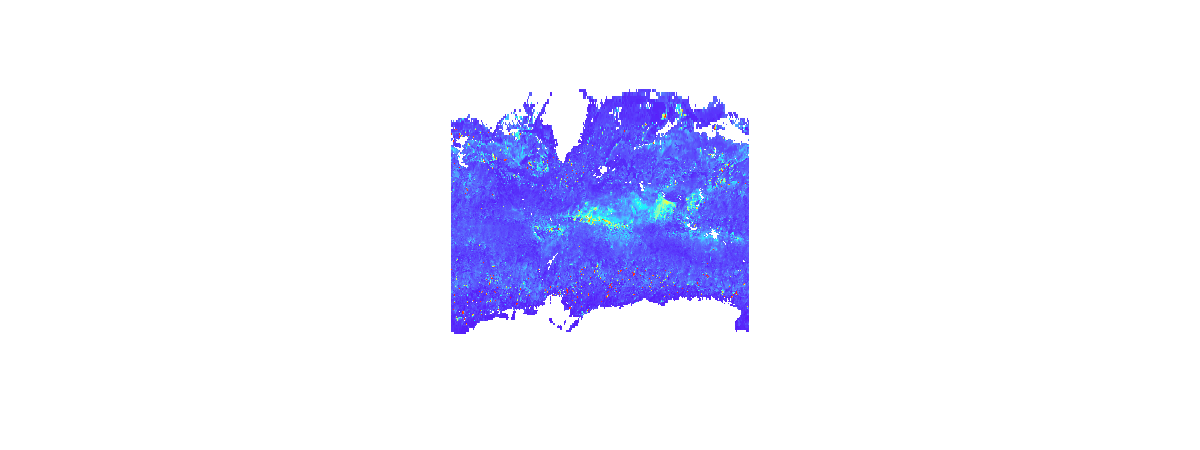

In [6]:
#Display the image layer
aod_img_lyr

In [15]:
#Now we are making a base map that is specific to the country of Angola, and adding the MISR data onto it
gis = GIS()
basemap = gis.map("Angola")
basemap.add_layer(aod_img_lyr)

In [16]:
#Display the base map with the imagery layer added on top. This is an interactive map, so you can zoom in and out, as 
#well as grabbing and moving the map
basemap

MapView(layout=Layout(height='400px', width='100%'))

### Analyzing Data Temporally

You can also show how a variable's values change over time using a temporal profile chart. Here I will show you how to make this chart with the Aerosol Optical Depth variable. 

In [9]:
#First we need to select a point on the map in the relevant area, and make a geometry point for those coordinates
print(aod_img_lyr.raster_info)
Congo_point = Point({"x" : -1.7597945, "y" : 17.8635643, "spatialReference" : {"wkid" : 102100}})

{'extent': {'xmin': -20037507.842788246, 'ymin': -30240971.45838615, 'xmax': 20037507.842788246, 'ymax': 30240971.45838615, 'spatialReference': {'wkid': 102100, 'latestWkid': 3857}}, 'bandCount': 1, 'pixelType': 'F32', 'pixelSizeX': 55659.744007745125, 'pixelSizeY': 55641.161836957035}


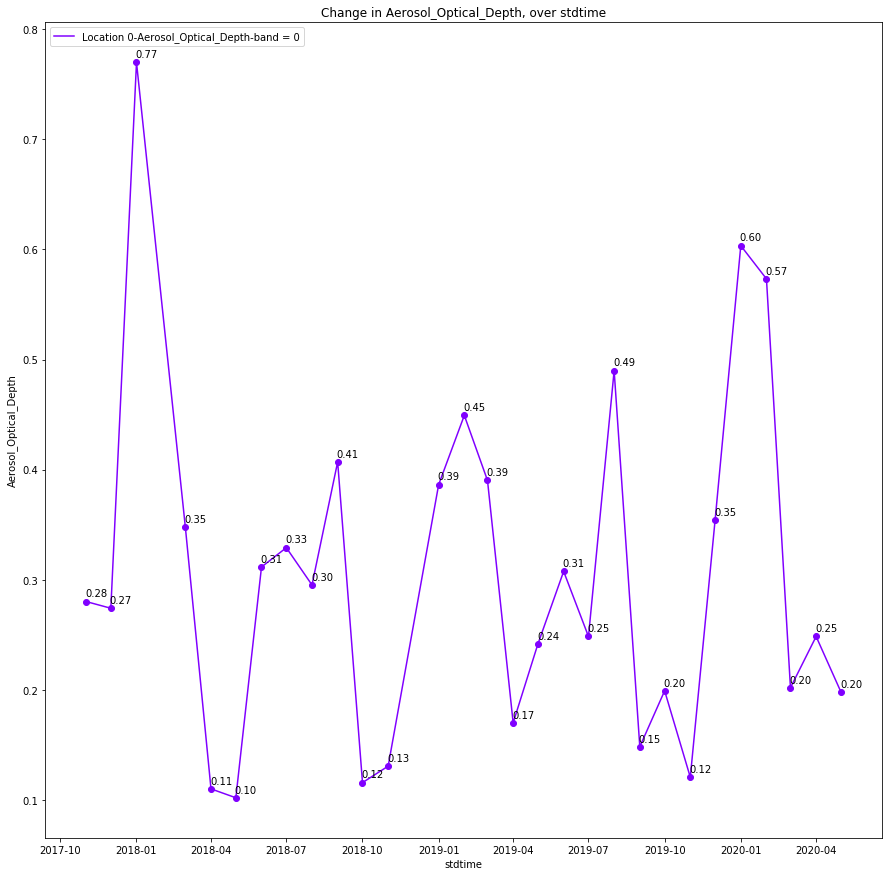

In [10]:
#Now we want to use the temporal_profile function for imagery layers to make and display the graph
#You will be able to use the geometry point just created, as well as the variables for Aerosol_Optical_Depth
#and stdtime, to make this graph. Showing the values also gives more context.
aod_img_lyr.temporal_profile(points = [Congo_point], time_field = "stdtime", variables = ["Aerosol_Optical_Depth"],
                             show_values = True)

You may notice that the date increments are different here than in the StoryMap. Even though we are using "stdtime" in both this Notebook and in ArcGIS Pro to create this graph, the values of each 3 month increment are different. Spikes in the winter are not expected. We expect to see spikes in AOD in the summer, and so further review is needed on this temporal profile function and graph to ensure that it is displaying the correct values for the correct dates. 

### Final Thoughts

Using the ArcGIS API for Python was both easy and hard at different times. There are significant resources online for help including the documentation for these specific modules:

- The [arcgis.gis](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html#item) documentation
- The [arcgis.raster](https://developers.arcgis.com/python/api-reference/arcgis.raster.toc.html#imagerylayer) documentation
- The [arcgis.geometry](https://developers.arcgis.com/python/api-reference/arcgis.geometry.html?highlight=geometry#module-arcgis.geometry) documentation

As well as several other relevant documentation resources including [Accessing and Creating Content](https://developers.arcgis.com/python/guide/accessing-and-creating-content/) for the content search and the [Using Imagery Layers](https://developers.arcgis.com/python/guide/using-imagery-layers/) guide to use the arcgis.raster ImageryLayers module. 

Knowing what resources are out-of-date was difficult on some webpages, so I would advise others who are doing research to use these tools to make sure that the functions and calls that you find are current. 

Finally, if given more time I would have ideally been able to finish debugging the temporal profile and included a time slider to the imagery layer. Both of these temporal analyses would help determine when the fires in Southern Africa were at their worst, as well as providing better visualization of the data over time. 